### Реализовать расчет производной для заданной функции в точке из интервала $[x_{0}, x_{1}]$, построить её график

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def f(x):
    return np.sin(x)

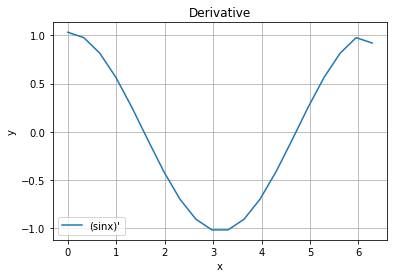

In [3]:
#Расчет производной sin(x) на отрезке [0; 2pi]

x0 = 0
x1 = 2 * np.pi
n = 20

x = np.linspace(x0, x1, n)
h = (x1 - x0) / n

df_x = np.zeros(n, float)
df_x[0] = (f(x)[1] - f(x)[0]) / h

for i in range(1, n-1):
    df_x[i] = (f(x)[i+1] - f(x)[i-1]) / (2 * h)
    
df_x[n-1] = (f(x)[i] - f(x)[i-1]) / h

plt.plot(x, df_x, label = "(sinx)'")
plt.title('Derivative')
plt.xlabel('x')
plt.ylabel('y') 
plt.legend()
plt.grid()
plt.show()

### Реализовать вычисление интеграла методом прямоугольников

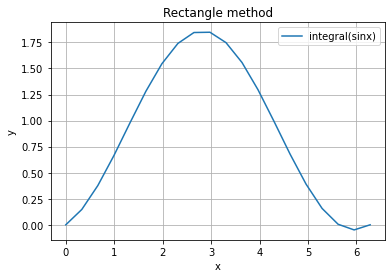

In [4]:
x = np.linspace(x0, x1, n)
h = (x1 - x0) / n

intgr = np.zeros(n, float)

for i in range(1, n):
    intgr[i] = intgr[i-1] + f((x)[i] + h / 2) * h
    
plt.plot(x, intgr, label = 'integral(sinx)')
plt.title('Rectangle method')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

### Реализовать вычисление интеграла методом трапеции

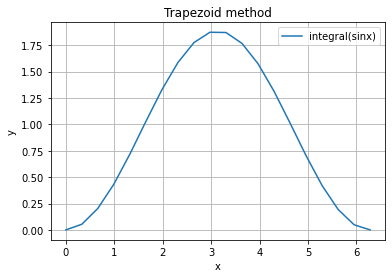

In [5]:
x = np.linspace(x0, x1, n)
h = (x1 - x0) / n

intgr = np.zeros(n, float)

for i in range(1,n):
    intgr[i] = intgr[i-1] + (f(x[i]-h) + f(x[i])) * h / 2
    
plt.plot(x, intgr, label='integral(sinx)')
plt.title('Trapezoid method')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

### Реализовать вычисление интеграла методом Симпсона

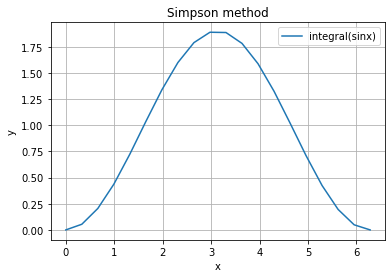

In [6]:
x = np.linspace(x0, x1, n)
h = (x1 - x0) / n

intgr = np.zeros(n, float)

for i in range(1,n):
    intgr[i] = intgr[i-1] + (f(x[i]-h) + f(x[i]) + 4 * f(x[i]-h/2)) * h / 6

plt.plot(x, intgr, label='integral(sinx)')
plt.title('Simpson method')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

Сравним все наши три метода.

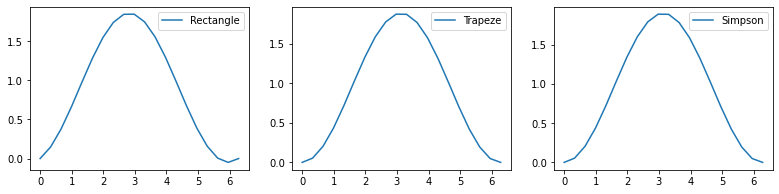

In [7]:
x = np.linspace(x0, x1, n)
h = (x1 - x0) / n

intgr = np.zeros(n, float)

def Rectangle():
    for i in range(1, n):
        intgr[i] = intgr[i-1] + f((x)[i] + h / 2) * h
    return intgr

def Trapeze():
    for i in range(1,n):
        intgr[i] = intgr[i-1] + (f(x[i]-h) + f(x[i])) * h / 2
    return intgr

def Simpson():
    for i in range(1,n):
        intgr[i] = intgr[i-1] + (f(x[i]-h) + f(x[i]) + 4 * f(x[i]-h/2)) * h / 6
    return intgr
        
plt.figure(figsize=(18, 3))
    
plt.subplot(141)
plt.plot(x, Rectangle(), label='Rectangle') 
plt.legend()
    
plt.subplot(142)
plt.plot(x, Trapeze(), label='Trapeze')
plt.legend()
    
plt.subplot(143)
plt.plot(x, Simpson(), label='Simpson')
plt.legend() 

plt.show() 

### Реализовать методы Эйлера (явный и неявный)

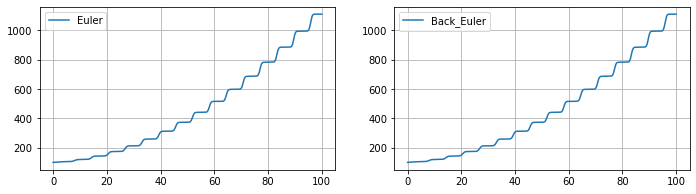

In [8]:
#частичто был показан на семинаре, дополнил лишь в паре мест

def euler(F, u0, tau, T):
    N_t = int(round(T/tau))
    F_ = lambda t, u: np.asarray(F(t, u))
    t = np.linspace(0, N_t*tau, N_t+1)
    u = np.zeros((N_t+1, len(u0)))
    u[0] = np.array(u0)
    for n in range(N_t):
        u[n+1] = u[n] + tau*F_(t[n], u[n])

    return u, t

def backward_euler(F, u0, tau, T):
    from scipy import optimize
    N_t = int(round(T/tau))
    F_ = lambda t, u: np.asarray(F(t, u))
    t = np.linspace(0, N_t*tau, N_t+1)
    u = np.zeros((N_t+1, len(u0)))
    u[0] = np.array(u0)

    def Phi(z, t, v):
        return z - tau*F_(t, z) - v
    
    for n in range(N_t):
        u[n+1] = optimize.fsolve(Phi, u[n], args=(t[n], u[n]))

    return u, t

def F(t, u):
        return t ** np.sin(t)

u, t = euler(F=F, u0=[100], tau=0.1, T=100)
u1, t1 = backward_euler(F=F, u0=[100], tau=0.1, T=100)

plt.figure(figsize=(18, 3))
plt.subplot(131)
plt.plot(t, u, label='Euler')
plt.grid()
plt.legend()

plt.subplot(132)
plt.plot(t1, u1, label='Back_Euler')
plt.grid()
plt.legend()

plt.show()

### Реализовать метод Рунге-Кутты

In [9]:
def f(x,y):
    return x * np.sqrt(y)

def fi(x):
    return (x ** 2 + 4) ** 2 / 16

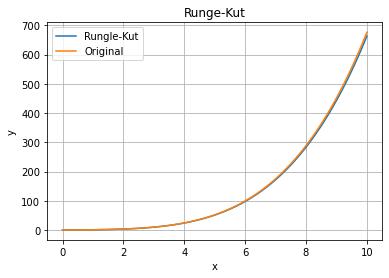

In [10]:
x0 = 0
x1 = 10
h = 0.1
n = int((x1 - x0) / 0.1)
y0 = float(1.)

x = np.linspace(x0, x1, n)
y = np.zeros(n, float)

y[0] = y0
for i in range(1, n):
    k1 = f(x[i-1], y[i-1])
    k2 = f(x[i-1] + h / 2, y[i-1] + h * k1 / 2)
    k3 = f(x[i-1] + h / 2, y[i-1] + h * k2 / 2)
    k4 = f(x[i-1] + h, y[i-1] + h * k3)
    y[i] = y[i-1] + h * (k1 + 2 * k2 + 2* k3 + k4) / 6   

plt.plot(x, y , label='Rungle-Kut')
plt.plot(x, fi(x), label="Original")
plt.title('Runge-Kut')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()